In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
card_data = pd.read_csv('creditcard.csv')
card_data.head()

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [3]:
card_data = card_data.drop(card_data.columns[0],axis = 1)
card_data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [4]:
card_data.isnull().values.any()

False

In [5]:
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
card           1319 non-null object
reports        1319 non-null int64
age            1319 non-null float64
income         1319 non-null float64
share          1319 non-null float64
expenditure    1319 non-null float64
owner          1319 non-null object
selfemp        1319 non-null object
dependents     1319 non-null int64
months         1319 non-null int64
majorcards     1319 non-null int64
active         1319 non-null int64
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [6]:
card_data['owner'] = card_data['owner'].map({'yes':1,'no':0})
card_data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,1,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,0,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,1,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,0,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,1,no,2,64,1,5


In [7]:
card_data['selfemp'] = card_data['selfemp'].map({'yes':1,'no':0})
card_data['card'] = card_data['card'].map({'yes':1,'no':0})
card_data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [8]:
card_data.corr()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
card,1.000000,-0.452577,0.000537,0.094308,0.388028,0.365814,0.147826,-0.054340,-0.036126,-0.000268,0.107769,0.080464
reports,-0.452577,1.000000,0.044089,0.011023,-0.159011,-0.136538,-0.053570,0.018835,0.019731,0.048968,-0.007304,0.207755
age,0.000537,0.044089,1.000000,0.324653,-0.115697,0.014948,0.367749,0.100421,0.212146,0.436426,0.009777,0.181070
income,0.094308,0.011023,0.324653,1.000000,-0.054429,0.281104,0.324776,0.112294,0.317601,0.130346,0.107138,0.180540
share,0.388028,-0.159011,-0.115697,-0.054429,1.000000,0.838779,-0.015764,-0.078905,-0.082618,-0.055348,0.051470,-0.023474
expenditure,0.365814,-0.136538,0.014948,0.281104,0.838779,1.000000,0.093180,-0.035638,0.052664,-0.029007,0.077514,0.054724
owner,0.147826,-0.053570,0.367749,0.324776,-0.015764,0.093180,1.000000,0.041673,0.309190,0.238652,0.063851,0.274924
selfemp,-0.054340,0.018835,0.100421,0.112294,-0.078905,-0.035638,0.041673,1.000000,0.042096,0.065912,0.004854,0.029555
dependents,-0.036126,0.019731,0.212146,0.317601,-0.082618,0.052664,0.309190,0.042096,1.000000,0.046512,0.010285,0.107133
months,-0.000268,0.048968,0.436426,0.130346,-0.055348,-0.029007,0.238652,0.065912,0.046512,1.000000,-0.041447,0.100028


In [9]:
pd.crosstab(card_data.card,card_data.owner)

owner,0,1
card,,
0,206,90
1,532,491


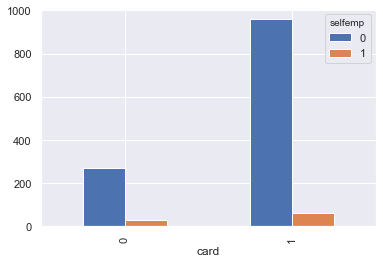

In [10]:
pd.crosstab(card_data.card,card_data.selfemp).plot(kind='bar')
plt.show()

In [11]:
pd.crosstab(card_data.owner,card_data.selfemp)

selfemp,0,1
owner,,
0,694,44
1,534,47


In [12]:
X = card_data.iloc[:,1:]
Y = card_data.iloc[:,0]
classifier = LogisticRegression()
classifier.fit(X,Y)
classifier.predict_proba(X)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.00000000e+00, 1.00000000e+00],
       [2.01651286e-06, 9.99997983e-01],
       [1.49800861e-09, 9.99999999e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [13]:
card_data.insert(loc=12, column='Predicted', value=classifier.predict(X))


In [14]:
card_data.head(10)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,Predicted
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12,1
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13,1
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5,1
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7,1
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5,1
5,1,0,23.25000,2.5000,0.044438,91.996670,0,0,0,54,1,1,1
6,1,0,27.91667,3.9600,0.012576,40.833330,0,0,2,7,1,5,1
7,1,0,29.16667,2.3700,0.076434,150.790000,1,0,0,77,1,3,1
8,1,0,37.00000,3.8000,0.245628,777.821700,1,0,0,97,1,6,1
9,1,0,28.41667,3.2000,0.019780,52.580000,0,0,0,65,1,18,1


In [15]:
y_pred = pd.DataFrame(classifier.predict_proba(X))
df = pd.concat([card_data,y_pred],axis=1)
df.head(20)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,Predicted,0,1
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12,1,0.000000e+00,1.000000
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13,1,2.016513e-06,0.999998
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5,1,1.498009e-09,1.000000
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7,1,0.000000e+00,1.000000
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5,1,0.000000e+00,1.000000
5,1,0,23.25000,2.5000,0.044438,91.996670,0,0,0,54,1,1,1,0.000000e+00,1.000000
6,1,0,27.91667,3.9600,0.012576,40.833330,0,0,2,7,1,5,1,0.000000e+00,1.000000
7,1,0,29.16667,2.3700,0.076434,150.790000,1,0,0,77,1,3,1,0.000000e+00,1.000000
8,1,0,37.00000,3.8000,0.245628,777.821700,1,0,0,97,1,6,1,0.000000e+00,1.000000
9,1,0,28.41667,3.2000,0.019780,52.580000,0,0,0,65,1,18,1,0.000000e+00,1.000000


In [16]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1314    1
1315    0
1316    1
1317    1
1318    1
Name: card, Length: 1319, dtype: int64

In [17]:
from sklearn.metrics import confusion_matrix
y_predicted = classifier.predict(X)
confusion_matrix = confusion_matrix(Y,y_predicted)
print (confusion_matrix)
type(y_pred)
accuracy = sum(Y==y_predicted)/card_data.shape[0]
accuracy

[[ 295    1]
 [  23 1000]]


0.9818043972706596